In [22]:
!pip3 install --upgrade matplotlib


In [26]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from shapely.geometry import MultiPolygon
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)


In [2]:
bairros_oficial = gpd.read_file('bairros/bairros 2023.shp', encoding='utf-8')

In [3]:
imoveis = pd.read_excel('BCIS 2023.xlsx')

In [4]:
bairros_oficial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Bairro    146 non-null    object  
 1   geometry  146 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.4+ KB


In [5]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148263 entries, 0 to 148262
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   insc_munic           148263 non-null  int64  
 1   nome_bairr           148263 non-null  object 
 2   formato              148256 non-null  object 
 3   topografia           148261 non-null  object 
 4   tipo_ocupacao        148197 non-null  object 
 5   especie_unidade      134236 non-null  object 
 6   regime_utilizacao    134241 non-null  object 
 7   conservacao_interna  134236 non-null  object 
 8   idade                134235 non-null  object 
 9   conservacao_externa  134230 non-null  object 
 10  limpeza_urbana       148229 non-null  object 
 11  tipo_pavimentacao    148259 non-null  object 
 12  coleta_lixo          148237 non-null  object 
 13  energia_eletrica     148243 non-null  object 
 14  area_lote            148263 non-null  float64
 15  testada          

In [6]:
UNIQUE_IMOVEIS = imoveis['insc_munic'].nunique()
f'{UNIQUE_IMOVEIS} imoveis unicos no dataset'


'138859 imoveis unicos no dataset'

In [7]:
imoveis_unique = imoveis.drop_duplicates(subset=['insc_munic', 'nome_bairr','area_lote'])

In [8]:
imoveis_unique.info()


<class 'pandas.core.frame.DataFrame'>
Index: 138859 entries, 0 to 148262
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   insc_munic           138859 non-null  int64  
 1   nome_bairr           138859 non-null  object 
 2   formato              138852 non-null  object 
 3   topografia           138857 non-null  object 
 4   tipo_ocupacao        138857 non-null  object 
 5   especie_unidade      124938 non-null  object 
 6   regime_utilizacao    124943 non-null  object 
 7   conservacao_interna  124938 non-null  object 
 8   idade                124937 non-null  object 
 9   conservacao_externa  124932 non-null  object 
 10  limpeza_urbana       138825 non-null  object 
 11  tipo_pavimentacao    138855 non-null  object 
 12  coleta_lixo          138833 non-null  object 
 13  energia_eletrica     138839 non-null  object 
 14  area_lote            138859 non-null  float64
 15  testada              1

In [9]:
imoveis_unique.head()

,insc_munic,nome_bairr,formato,topografia,tipo_ocupacao,especie_unidade,regime_utilizacao,conservacao_interna,idade,conservacao_externa,limpeza_urbana,tipo_pavimentacao,coleta_lixo,energia_eletrica,area_lote,testada,lateral_direita,lateral_esquerda,fundos,area_total_const,numero_unidade,numero_pavimento,area_principal,num_moradores,num_comodos,num_quartos,area_edicula,area_total_subunid,venal
0,162060001000,DIST INDUSTRIAL,Regular,Plano,Vago,NaN,NaN,NaN,NaN,NaN,Sim,Pre moldados,Sim,Sim,2.50,1.27,1.95,1.98,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.00
1,150970072001,SAO RAIMUNDO,Irregular,Plano,Construido,Casa,Residencial,Regular,mais de 20 anos,Regular,Nao,Pedra,Sim,Sim,3.00,3.00,13.70,16.35,8.15,66.00,1.00,1.00,66.00,006,0.00,0.00,0.00,66.00,49006.01
2,41750001000,VALE VERDE,Irregular,Aclive,Vago,NaN,NaN,NaN,NaN,NaN,Sim,Pre moldados,Sim,Sim,3.43,2.76,1.92,1.34,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047.42
3,23230193000,ALTO SIR,Irregular,Aclive,Vago,NaN,NaN,NaN,NaN,NaN,Sim,Pre moldados,Sim,Sim,4.45,4.95,2.45,0.70,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.59
4,140920224000,VILA BRETAS,Irregular,Plano,Vago,NaN,NaN,NaN,NaN,NaN,Sim,Pre moldados,Sim,Sim,5.93,2.09,3.50,3.37,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2734.32


In [10]:
UNIQUE_BAIRROS = imoveis_unique['nome_bairr'].nunique()
f'{UNIQUE_BAIRROS} bairros unicos no dataset'

'188 bairros unicos no dataset'

In [69]:
def plotar_grafico_barras(df, coluna):
    contagem_valores = df[coluna].value_counts(dropna=False)  # Inclui NaN na contagem
    
    plt.figure(figsize=(10, 6))
    grafico = contagem_valores.plot(kind='bar', color='skyblue')
    plt.title(f'Contagem de valores na coluna "{coluna}" (incluindo NaN)')
    plt.xlabel('Valores')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for index, value in enumerate(contagem_valores):
        plt.text(index, value + 0.1, str(value), ha='center')  # Adiciona rótulo com o valor acima de cada barra
    
    plt.tight_layout()
    plt.show()

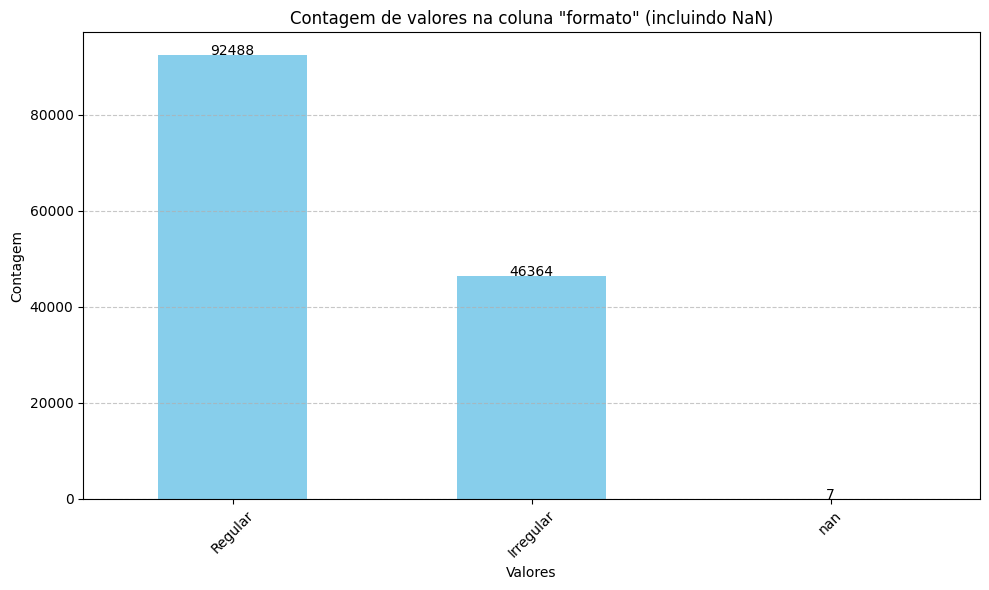

In [70]:
plotar_grafico_barras(imoveis_unique,'formato')

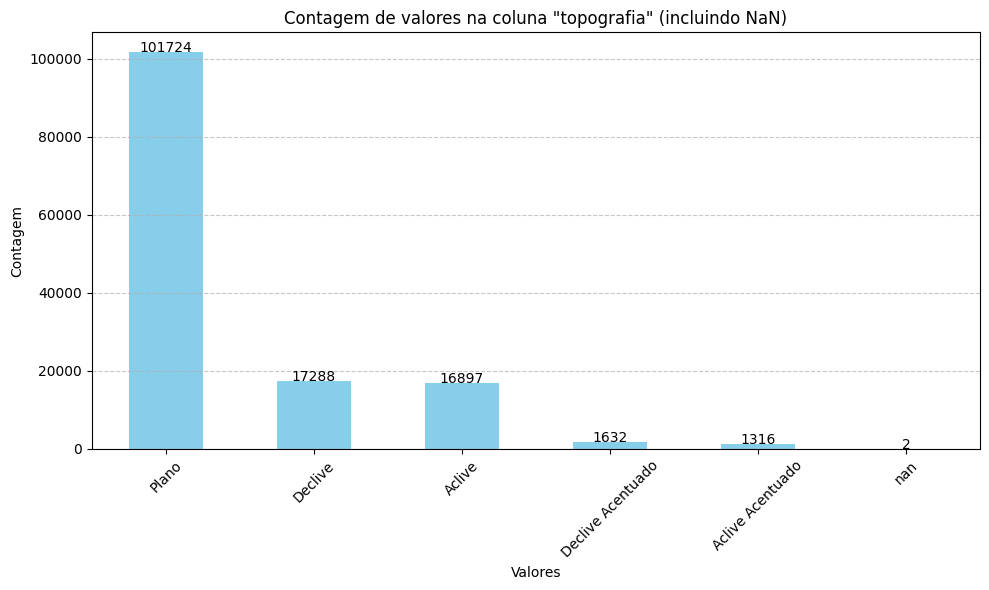

In [71]:
plotar_grafico_barras(imoveis_unique,'topografia')

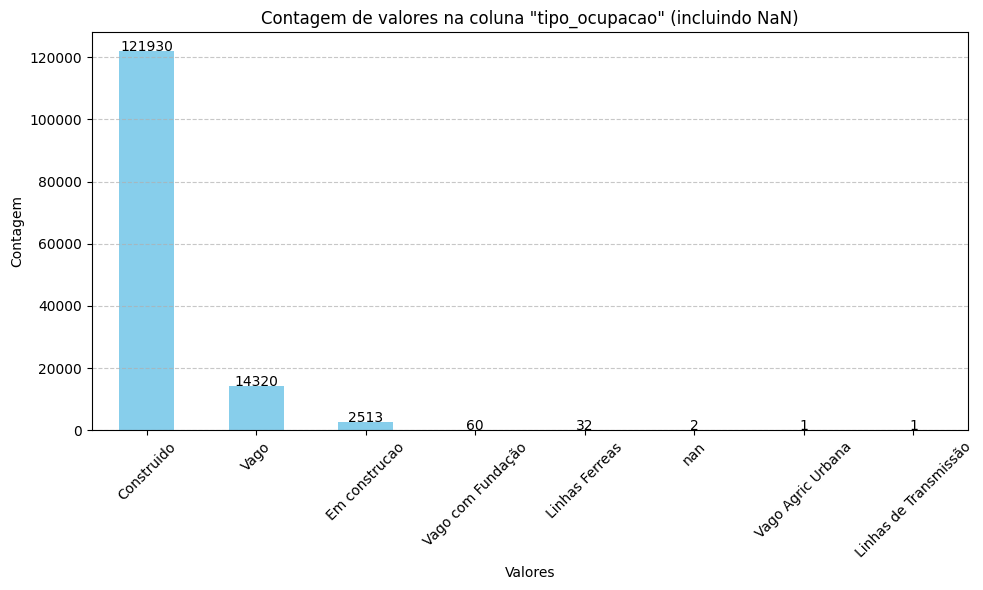

In [72]:
plotar_grafico_barras(imoveis_unique,'tipo_ocupacao')

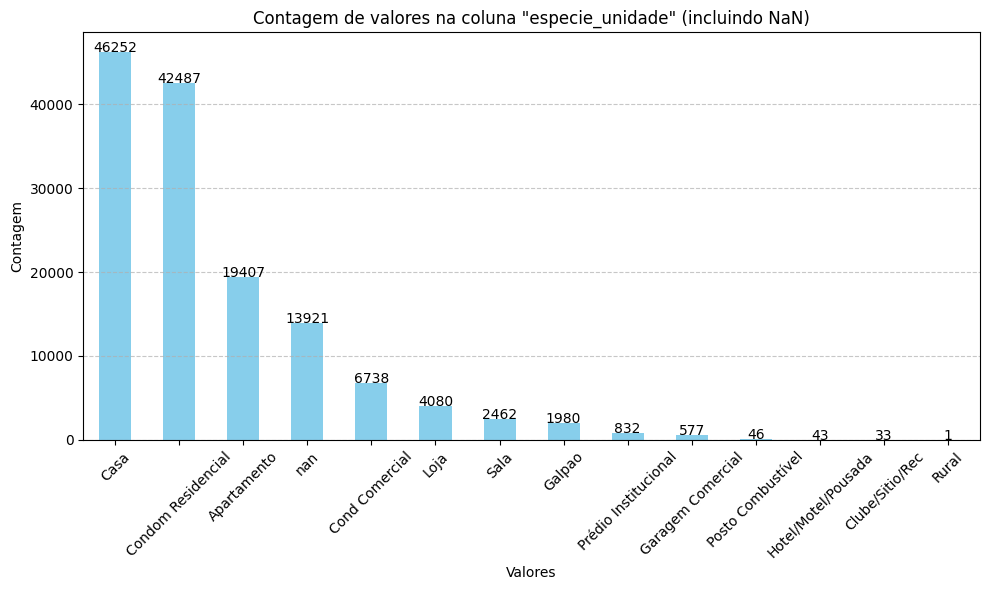

In [73]:
plotar_grafico_barras(imoveis_unique,'especie_unidade')

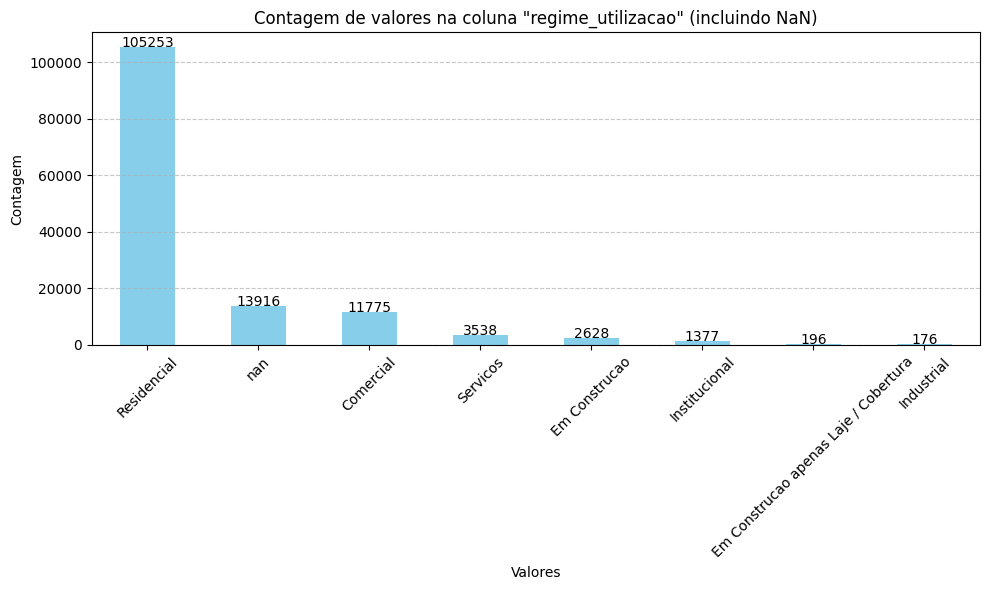

In [74]:
plotar_grafico_barras(imoveis_unique,'regime_utilizacao')

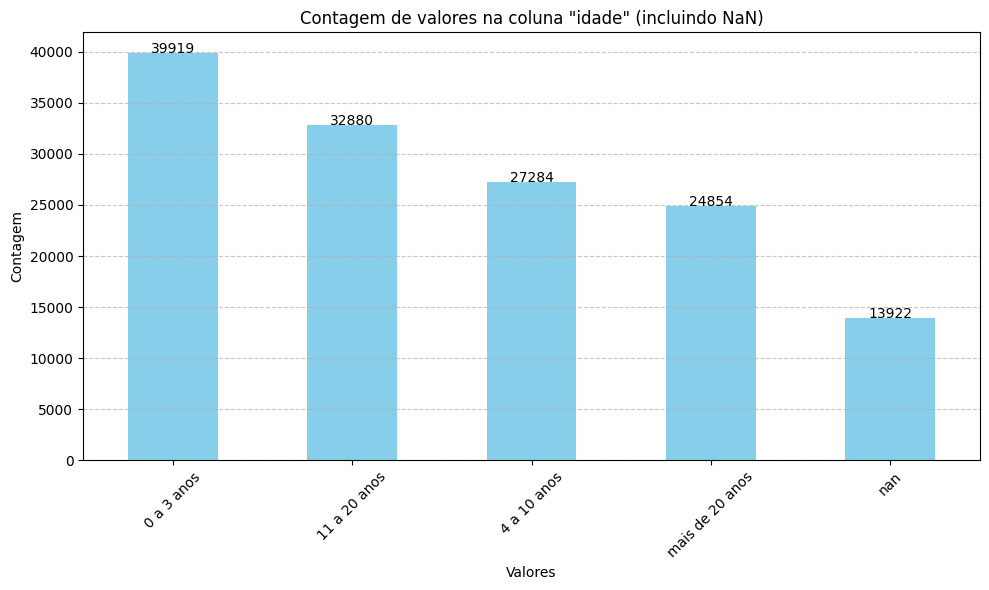

In [75]:
plotar_grafico_barras(imoveis_unique,'idade')

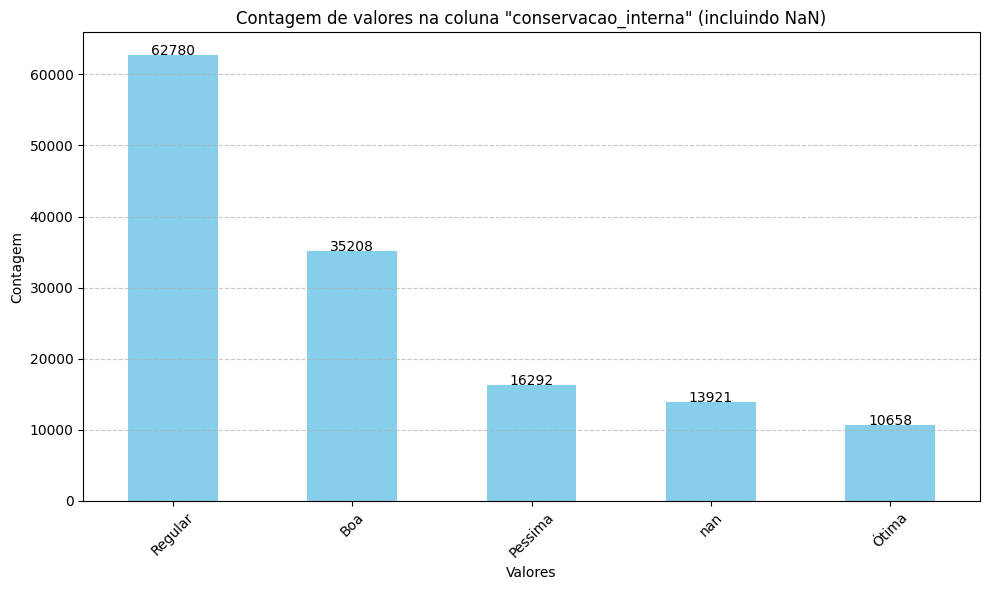

In [76]:
plotar_grafico_barras(imoveis_unique,'conservacao_interna')

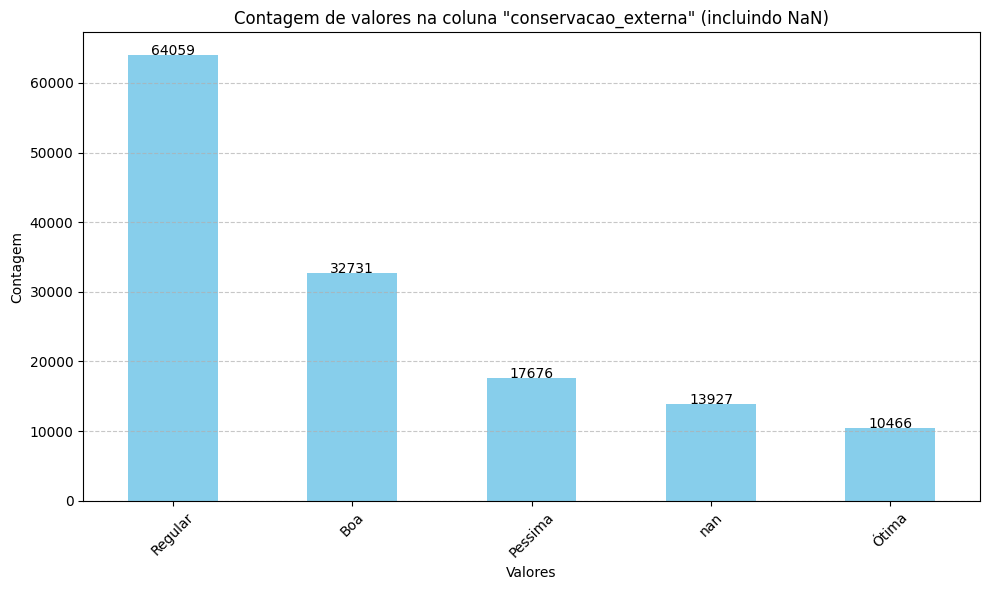

In [77]:
plotar_grafico_barras(imoveis_unique,'conservacao_externa')

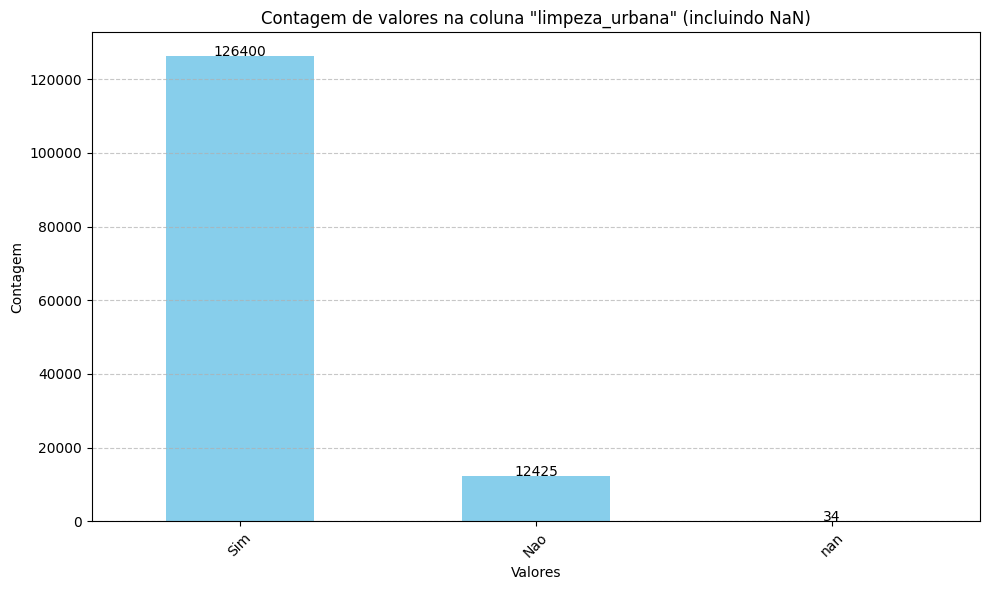

In [78]:
plotar_grafico_barras(imoveis_unique,'limpeza_urbana')

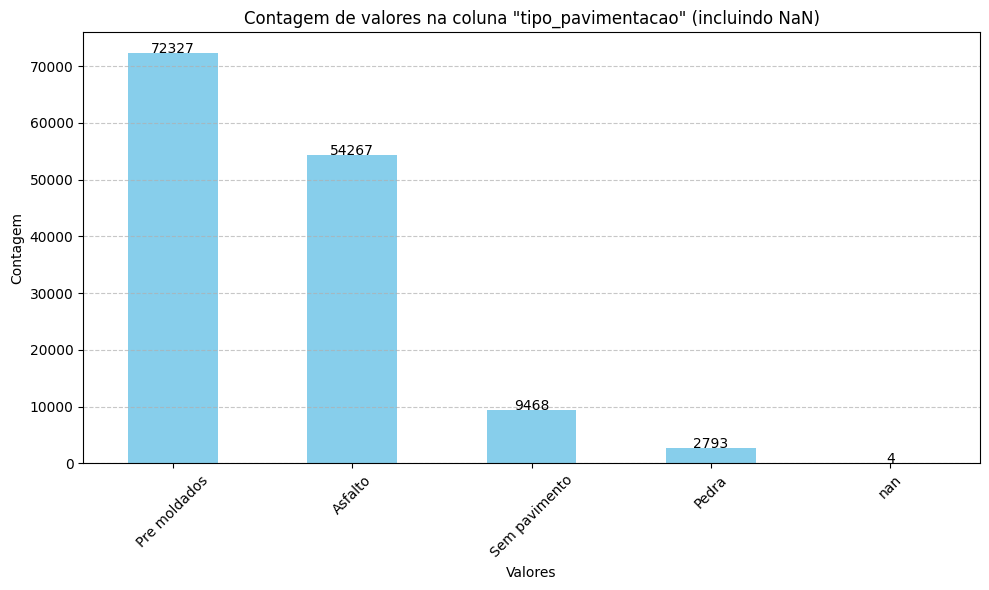

In [79]:
plotar_grafico_barras(imoveis_unique,'tipo_pavimentacao')

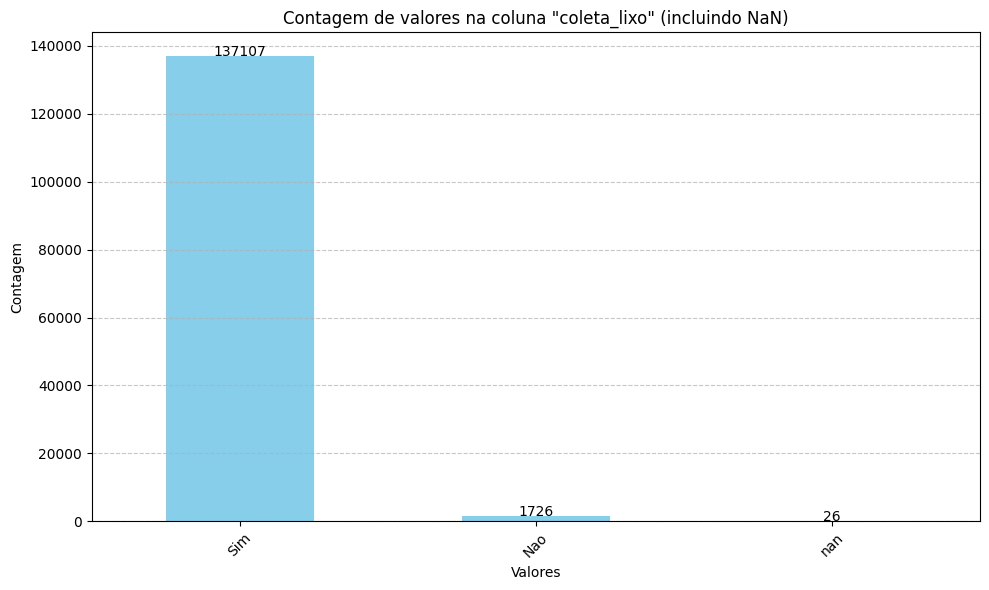

In [80]:
plotar_grafico_barras(imoveis_unique,'coleta_lixo')

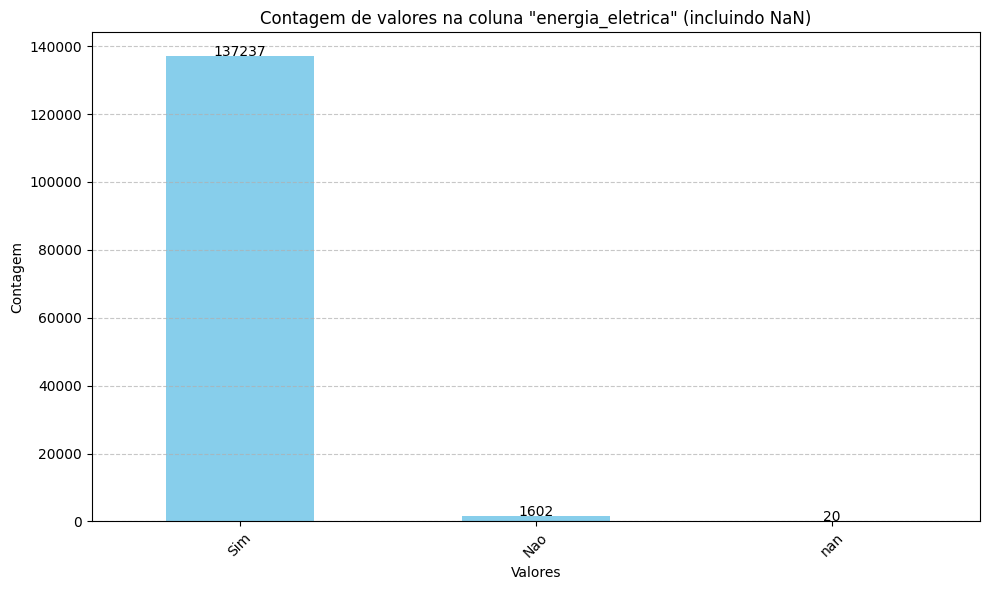

In [81]:
plotar_grafico_barras(imoveis_unique,'energia_eletrica')